In [63]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [70]:
from numpy import shape


class SVM ():
    def __init__ (self, alpha = 0.001,lambda_param = 0.1,n_iteration =1000 ) :
        self.alpha = alpha
        self.lambda_param = lambda_param
        self.n_iteration = n_iteration
        self.w = None
        self.b = None
    def fit (self , X , y) :
        y_ = np.where (y <=0 , -1 ,1)
        m , n =X.shape
        self.w = np.zeros (n)
        self.b = 0
        for _ in range(self.n_iteration) :
            for idx, x in enumerate (X):
            # y : 1 x 800 
                f_x = np.matmul (x , self.w) - self.b
                #f_x : 1 x 800
                condition = y[idx]  * f_x >= 1
                
                if (condition) :
                    self.w -= self.alpha*(2*self.lambda_param * self.w)
                else :
                    self.w -= self.alpha*(2*self.lambda_param * self.w -np.dot(x, y[idx]))
                    self.b -= self.alpha * y[idx]
    def predict (self , X) :
        prediction = np.matmul (X , self.w) - self.b
        return np.sign(prediction)
def accuracy (predict , test) :
        return np.sum( predict == test)/ len(predict)       

In [67]:
def accuracy (predict , test) :
        return np.sum( predict == test)/ len(test)
#make data
X , y= datasets.make_blobs(n_samples=10000,n_features= 10 ,centers = 2 , random_state = 42)
X_train , X_test , Y_train , Y_test = train_test_split(X , y ,test_size =0.2 , random_state= 42)

#create model and train
svm = SVM ()
Y_train = np.where (Y_train == 0 , -1 ,1)
svm.fit (X_train , Y_train)

#predict
predict = svm.predict (X_test)
#convert test to right format
a = lambda y: -1 if ( y == 0) else 1
print (Y_test[:10])
#Test
Y_test = np.array([a(y) for y in Y_test])
print (Y_test[:10])
accuracy (predict ,Y_test)

[0 1 1 1 0 1 1 1 1 1]
[-1  1  1  1 -1  1  1  1  1  1]


1.0

In [79]:
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, svm.w,svm.b, 0)
        x1_2 = get_hyperplane_value(x0_2, svm.w, svm.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, svm.w, svm.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, svm.w, svm.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, svm.w, svm.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, svm.w, svm.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min, x1_max])

        plt.show()

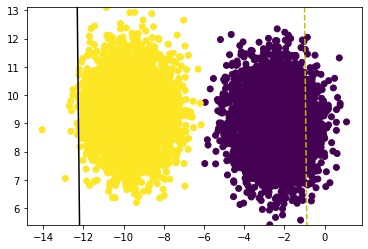

In [80]:
visualize_svm()